In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras import layers
import numpy as np
import keras as keras
from tensorflow.python.keras.models import Sequential
import matplotlib.pyplot as plt
import PIL

!pip install tf-nightly
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [13]:
import tensorflow as tf
# training and validation data
batch_size = 32
img_height = 150
img_width = 150
train_data_dir = "../input/intel-image-classification/seg_train/seg_train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 14034 files belonging to 6 classes.


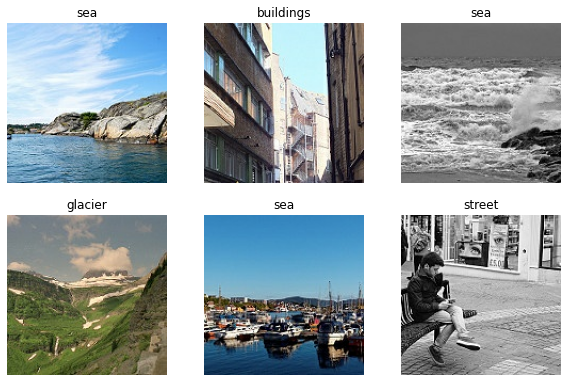

In [65]:
    plt.figure(figsize=(10, 10))
    for images, labels in train_ds.take(1):
      for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [14]:
batch_size = 32
img_height = 150
img_width = 150
test_data_dir = "../input/intel-image-classification/seg_test/seg_test/"
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3000 files belonging to 6 classes.


In [15]:
# class names
class_names = train_ds.class_names
print(class_names)

for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
(32, 150, 150, 3)
(32,)


In [16]:
# feature scaling
normalization_layer = layers.experimental.preprocessing.Rescaling(1. / 255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [17]:
# creating the model
num_classes = 6
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1. / 255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [18]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [19]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs
)

Epoch 1/10
439/439 [==============================] - 197s 448ms/step - loss: 1.1491 - accuracy: 0.5508 - val_loss: 0.6776 - val_accuracy: 0.7507
Epoch 2/10
439/439 [==============================] - 198s 452ms/step - loss: 0.6287 - accuracy: 0.7723 - val_loss: 0.6236 - val_accuracy: 0.7780
Epoch 3/10
439/439 [==============================] - 195s 443ms/step - loss: 0.4857 - accuracy: 0.8258 - val_loss: 0.6345 - val_accuracy: 0.7830
Epoch 4/10
439/439 [==============================] - 193s 439ms/step - loss: 0.3601 - accuracy: 0.8724 - val_loss: 0.6241 - val_accuracy: 0.7947
Epoch 5/10
439/439 [==============================] - 197s 450ms/step - loss: 0.2543 - accuracy: 0.9142 - val_loss: 0.8205 - val_accuracy: 0.7887
Epoch 6/10
439/439 [==============================] - 191s 435ms/step - loss: 0.1843 - accuracy: 0.9383 - val_loss: 0.8032 - val_accuracy: 0.8087
Epoch 7/10
439/439 [==============================] - 192s 437ms/step - loss: 0.1235 - accuracy: 0.9605 - val_loss: 1.0233 -

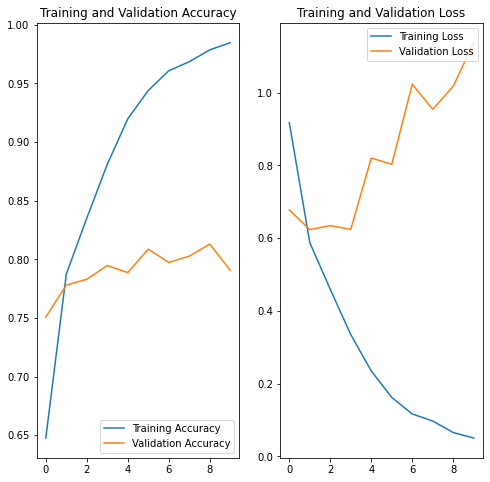

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
model.evaluate(test_ds)

94/94 [==============================] - 13s 139ms/step - loss: 1.1377 - accuracy: 0.7907


[1.1376900672912598, 0.7906666398048401]

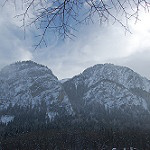

In [66]:
PIL.Image.open("../input/intel-image-classification/seg_pred/seg_pred/10013.jpg")

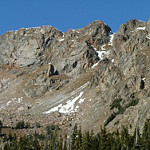

In [67]:
PIL.Image.open("../input/intel-image-classification/seg_pred/seg_pred/10017.jpg")

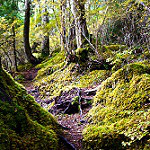

In [68]:
PIL.Image.open("../input/intel-image-classification/seg_pred/seg_pred/10021.jpg")

In [50]:
image_paths = ['10013.jpg', '10017.jpg', '10021.jpg']

for image_path in image_paths:
    root_path = "../input/intel-image-classification/seg_pred/seg_pred/"
    path = root_path + image_path
    image = tf.keras.preprocessing.image.load_img(path)
    input_arr = keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    score = tf.nn.softmax(model.predict(input_arr))
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

This image most likely belongs to mountain with a 95.29 percent confidence.
This image most likely belongs to glacier with a 62.87 percent confidence.
This image most likely belongs to forest with a 100.00 percent confidence.
